In [8]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [9]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
    
def gaussian_low_pass(dist, shape):
    base = np.zeros(shape[:2])
    rows, cols = shape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y, x), center) ** 2) / (2 * (dist ** 2))))
    return base

def circular_low_pass(dist, shape):
    base = np.zeros(shape[:2])
    rows, cols = shape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 0 if distance((y, x), center) > dist else 1
    return base

def circular_high_pass(dist, shape):
    return 1 - circular_low_pass(dist, shape)

def circular_band_pass(dist_int, dist_ext, shape):
    base = np.zeros(shape[:2])
    rows, cols = shape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 if (dist_int < distance((y, x), center) < dist_ext) else 0
    return base

def circular_band_stop(dist_int, dist_ext, shape):
    return 1 - circular_band_pass(dist_int, dist_ext, shape)

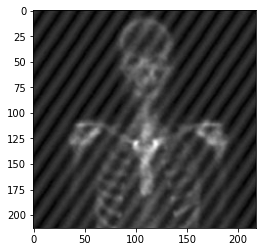

In [10]:
A = plt.imread("images/skel.png")
plt.imshow(A, cmap="gray")



(array([[ 62., 114.,  37., ...,   0.,   0.,   0.],
        [ 65., 113.,  35., ...,   0.,   0.,   0.],
        [ 66., 116.,  31., ...,   0.,   0.,   0.],
        ...,
        [ 71., 114.,  28., ...,   0.,   0.,   0.],
        [ 68., 115.,  30., ...,   0.,   0.,   0.],
        [ 94., 119.,   0., ...,   0.,   0.,   0.]]),
 array([0.        , 0.09803922, 0.19607843, 0.29411766, 0.39215687,
        0.49019608, 0.5882353 , 0.6862745 , 0.78431374, 0.88235295,
        0.98039216], dtype=float32),
 <a list of 218 BarContainer objects>)

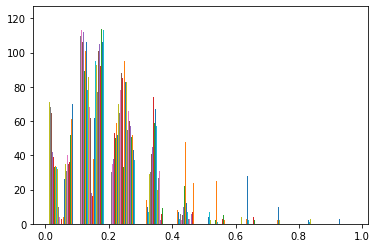

In [11]:
plt.hist(A)

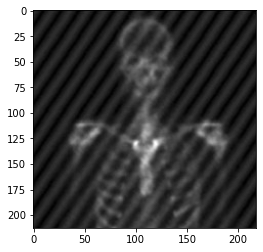

In [12]:
B = A ** 1.1
plt.imshow(B, cmap="gray")


(array([[ 82., 131.,   0., ...,   0.,   0.,   0.],
        [ 83., 130.,   0., ...,   0.,   0.,   0.],
        [ 89., 124.,   0., ...,   0.,   0.,   0.],
        ...,
        [ 92., 121.,   0., ...,   0.,   0.,   0.],
        [ 88., 125.,   0., ...,   0.,   0.,   0.],
        [119.,  94.,   0., ...,   0.,   0.,   0.]]),
 array([0.        , 0.09784526, 0.19569053, 0.2935358 , 0.39138106,
        0.4892263 , 0.5870716 , 0.68491685, 0.7827621 , 0.88060737,
        0.9784526 ], dtype=float32),
 <a list of 218 BarContainer objects>)

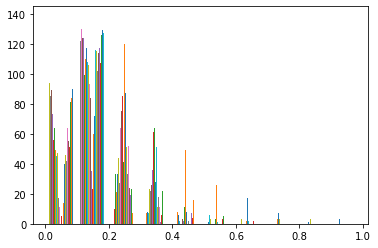

In [13]:
plt.hist(B)

(213, 218)


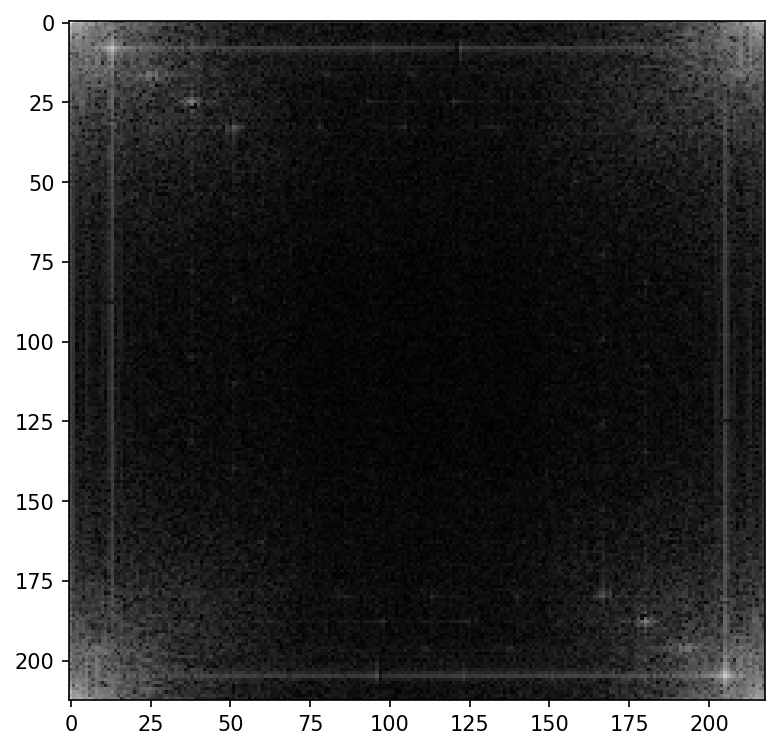

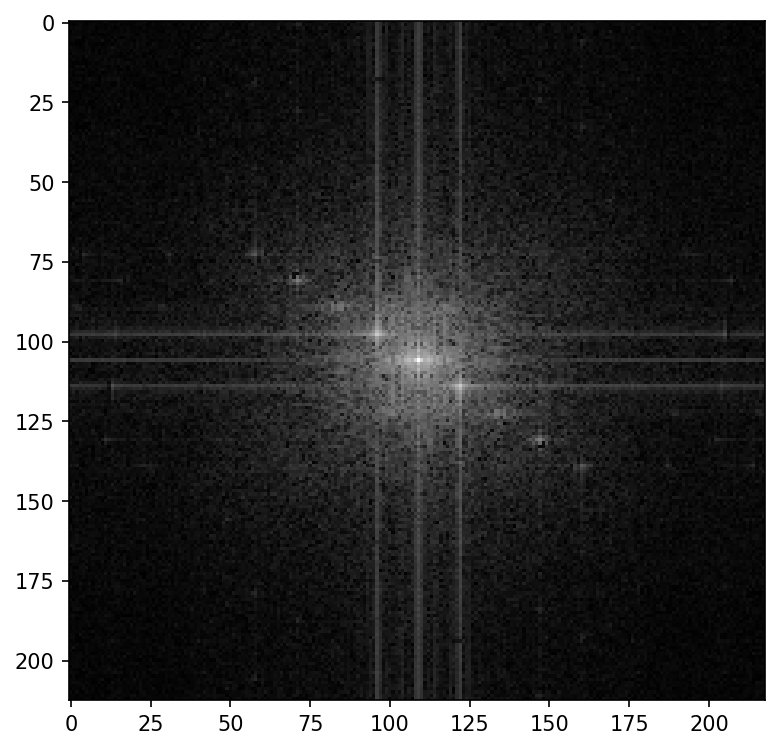

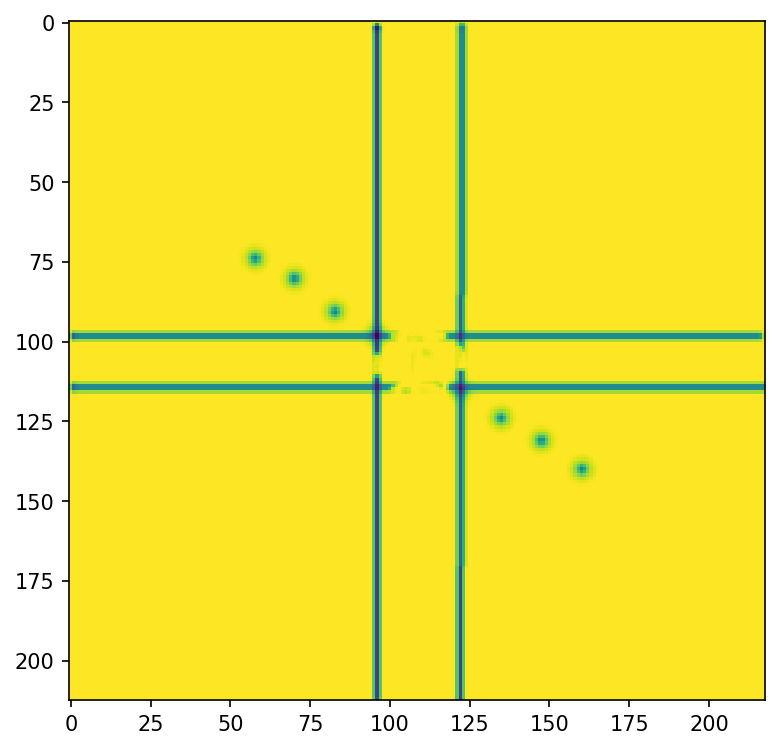

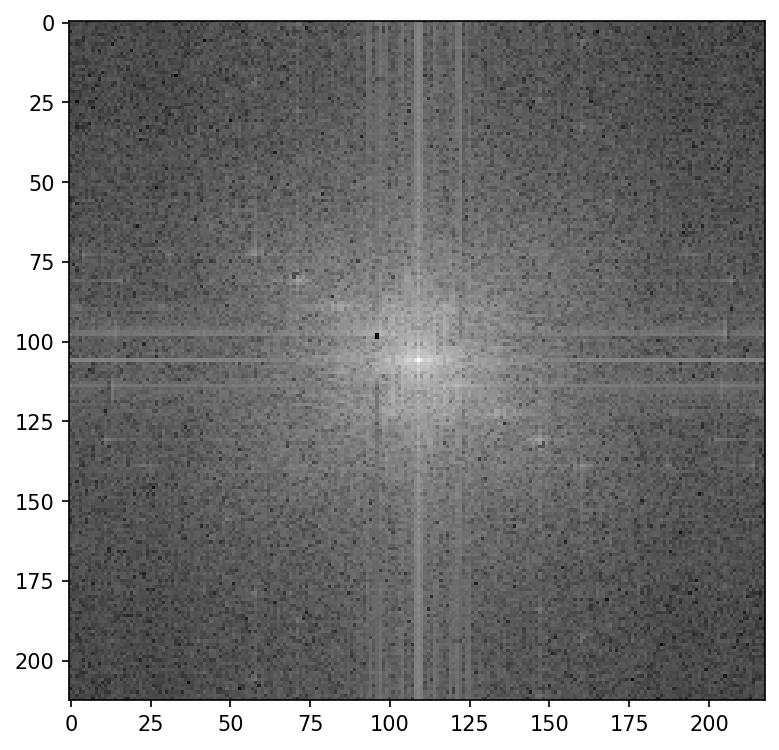

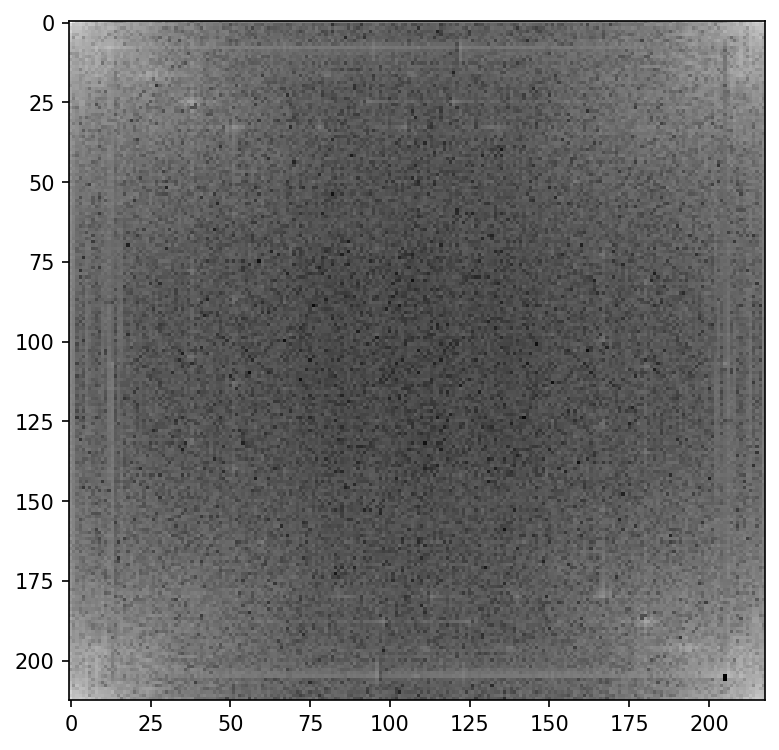

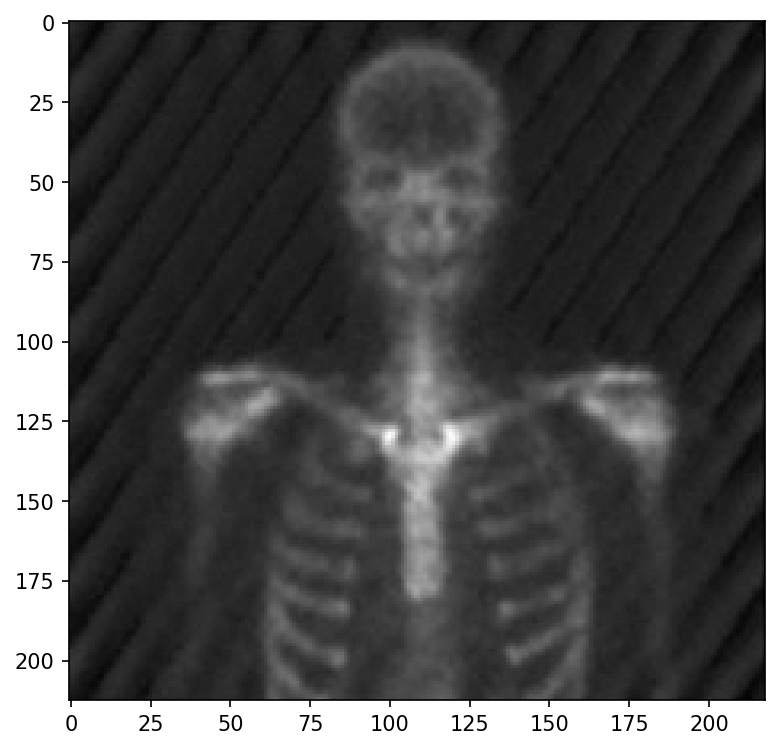

In [20]:
# Original images
# plt.figure(figsize=(6, 6), dpi=150)
# A = np.asarray(Image.open("images/c.jpg").convert("L"))
# plt.imshow(A, cmap="gray")

print(A.shape)

# Espectro
plt.figure(figsize=(6, 6), dpi=150)
FFT_image = np.fft.fft2(A)
plt.imshow(np.log(1 + np.abs(FFT_image)), cmap="gray")

# Espectro corregidos
IFFT_image = np.fft.fftshift(FFT_image)

plt.figure(figsize=(6, 6), dpi=150)
plt.imshow(np.log(1 + np.abs(IFFT_image)), cmap="gray")

D = np.log(1 + np.abs(IFFT_image))
plt.imsave("test.png", D)

FILTRO = np.asarray(Image.open("FILTRO.png").convert("L"))

plt.figure(figsize=(6, 6), dpi=150)
plt.imshow(FILTRO)


# Espectro filtrado
FILTERED = IFFT_image * FILTRO

plt.figure(figsize=(6, 6), dpi=150)
plt.imshow(np.log(1 + np.abs(FILTERED)), cmap="gray")

# Espectro invertido
img_ifftshift = np.fft.ifftshift(FILTERED)

plt.figure(figsize=(6, 6), dpi=150)
plt.imshow(np.log(1 + np.abs(img_ifftshift)), cmap="gray")

# Imagen reconstruida
img_ifft = np.fft.ifft2(img_ifftshift)

plt.figure(figsize=(6, 6), dpi=150)
plt.imshow((np.abs(img_ifft)), cmap="gray")

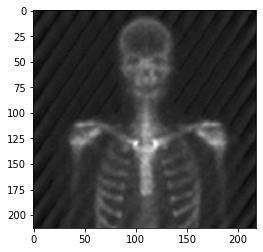

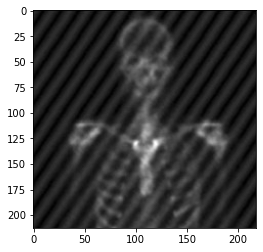

In [22]:
plt.imshow((np.abs(img_ifft)), cmap="gray")
plt.figure()
plt.imshow(B, cmap="gray")
